In [2]:
import pandas as pd

OG = pd.read_csv('creditcard.csv')

print (OG.head())

print(OG.info())

print(OG.isnull().sum())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

class_distribution :
Class
0    284315
1       492
Name: count, dtype: int64
percentage of fraudulent transactions: 0.17%


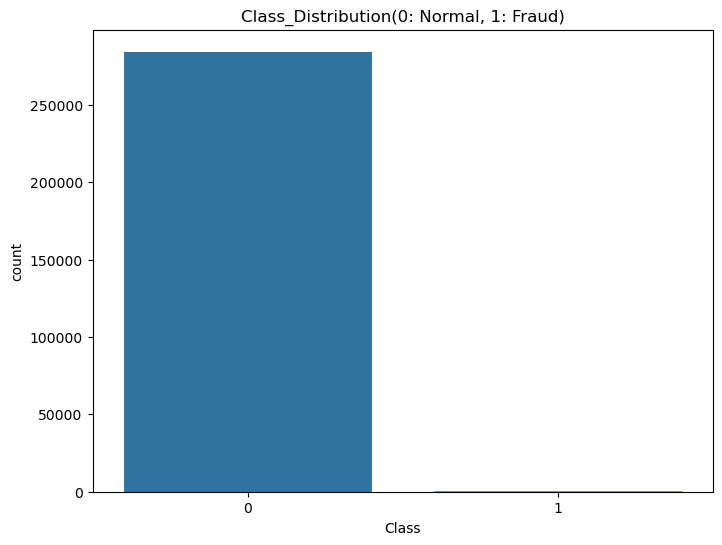

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  Normalized Amount  Normalize

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

OG = pd.read_csv('creditcard.csv')

scaler = StandardScaler()
OG['Normalized Amount'] = scaler.fit_transform(OG['Amount'].values.reshape(-1, 1))
OG['Normalized Time'] = scaler.fit_transform(OG['Time'].values.reshape(-1, 1))

OG = OG.drop(['Amount', 'Time'], axis= 1)

class_distribution = OG['Class'].value_counts()
print("class_distribution :")
print(class_distribution)

fraud_percentage = (class_distribution[1] / len(OG) * 100)
print(f"percentage of fraudulent transactions: {fraud_percentage:.2f}%")

plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=OG)
plt.title( 'Class_Distribution(0: Normal, 1: Fraud)')
plt.show()

print(OG.head())

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot
import seaborn as sns

X = OG.drop('Class', axis=1)
Y = OG['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

frauds = OG[OG['Class'] == 1]
frauds.to_csv('fraud_transactions.csv', index=False)
print('Fraud transactions saved to fraud_transactions.csv')

[[56863     1]
 [   24    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Fraud transactions saved to fraud_transactions.csv
